A clinician has rated the presence of diabetic retinopathy in each image on a scale of 0 to 4, according to the following scale:

0 - No DR

1 - Mild

2 - Moderate

3 - Severe

4 - Proliferative DR

In [1]:
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import os
train_lable = pd.read_csv("/content/drive/MyDrive/train_lable.csv")

In [2]:
train_lable.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [3]:
# Create pathnames from image ID's
filenames2 = ["drive/My Drive/data/train/" + fname + ".jpeg" for fname in train_lable["image"]]

# Check the first 12
filenames2[:12]

['drive/My Drive/data/train/10_left.jpeg',
 'drive/My Drive/data/train/10_right.jpeg',
 'drive/My Drive/data/train/13_left.jpeg',
 'drive/My Drive/data/train/13_right.jpeg',
 'drive/My Drive/data/train/15_left.jpeg',
 'drive/My Drive/data/train/15_right.jpeg',
 'drive/My Drive/data/train/16_left.jpeg',
 'drive/My Drive/data/train/16_right.jpeg',
 'drive/My Drive/data/train/17_left.jpeg',
 'drive/My Drive/data/train/17_right.jpeg',
 'drive/My Drive/data/train/100_left.jpeg',
 'drive/My Drive/data/train/100_right.jpeg']

In [4]:
from IPython.display import Image
#Image(filenames[5])
len(filenames2)

8406

In [5]:
#import os
#import os.path
#filenames2 = []

#for i in range(len(filenames)):
#  if not os.path.isfile(filenames[i]):
#    train_lable = train_lable.drop(i)
#  else:
#    filenames2.append(filenames[i])

#train_lable.reset_index(drop=True,inplace=True)
#len(filenames2), len(train_lable)

In [6]:
#train_lable.to_csv('/content/drive/MyDrive/train_lable.csv', index=False)

In [7]:
import numpy as np
labels = train_lable.level.to_numpy()
len(labels)

8406

In [8]:
#bad = []
#for i in range(1000):
  #try:
    #image = tf.io.read_file(filenames2[i])
   # image = tf.image.decode_jpeg(image, channels=3)
  #except:
  #  bad.append(filenames2[i])
 #   train_lable.drop(i, inplace=True)

#len(bad)

In [9]:
#bad

In [10]:
#train_lable.reset_index(inplace=True)
#train_lable.drop(80, inplace=True)

In [11]:
#train_lable.drop("index", axis=1, inplace=True)
#train_lable

In [12]:
#train_lable.to_csv('/content/drive/MyDrive/train_lable.csv', index=False)

In [13]:
unique_statuse = np.unique(labels)
len(unique_statuse)

5

In [14]:
boolean_labels = [label == unique_statuse for label in labels]
boolean_labels[:5]

[array([ True, False, False, False, False]),
 array([ True, False, False, False, False]),
 array([ True, False, False, False, False]),
 array([ True, False, False, False, False]),
 array([False,  True, False, False, False])]

In [15]:
# Setup X & y variables
X = filenames2
y = boolean_labels

In [16]:
len(X), len(y)

(8406, 8406)

In [17]:
# Set number of images to use for experimenting
NUM_IMAGES = 4000 #@param {type:"slider", min:1000, max:8000, step:1000}

In [18]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(3200, 3200, 800, 800)

In [19]:
X_train[:5], y_train[:5]

(['drive/My Drive/data/train/14017_left.jpeg',
  'drive/My Drive/data/train/1429_right.jpeg',
  'drive/My Drive/data/train/12795_right.jpeg',
  'drive/My Drive/data/train/10523_right.jpeg',
  'drive/My Drive/data/train/1532_left.jpeg'],
 [array([ True, False, False, False, False]),
  array([ True, False, False, False, False]),
  array([False, False,  True, False, False]),
  array([ True, False, False, False, False]),
  array([False,  True, False, False, False])])

In [20]:
from matplotlib.pyplot import imread
image = imread(filenames2[42])
image.shape

(2336, 3504, 3)

In [21]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

In [22]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the assosciated label,
  processes the image and reutrns a typle of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [23]:
# Demo of the above
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.        , 0.00748299, 0.00356142],
         [0.        , 0.00784314, 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.00784314, 0.00392157],
         [0.        , 0.        , 0.        ],
         [0.00392157, 0.00392157, 0.        ]],
 
        [[0.00094038, 0.00766307, 0.00430172],
         [0.        , 0.00336134, 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.00336134, 0.        ],
         [0.        , 0.        , 0.        ],
         [0.00228138, 0.00340183, 0.00284161]],
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.00784314, 0.00392157]],
 
        ...,
 
        [[0.        , 0.        

In [24]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [25]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [26]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 5), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 5), dtype=tf.bool, name=None)))

In [27]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_statuse[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [28]:
train_data


<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.bool, name=None))>

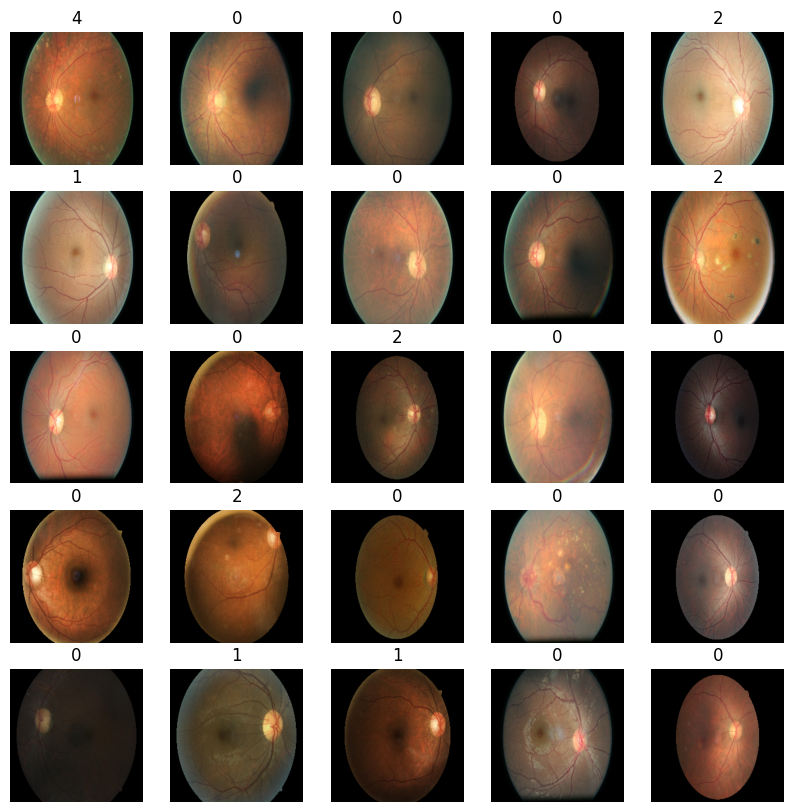

In [29]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

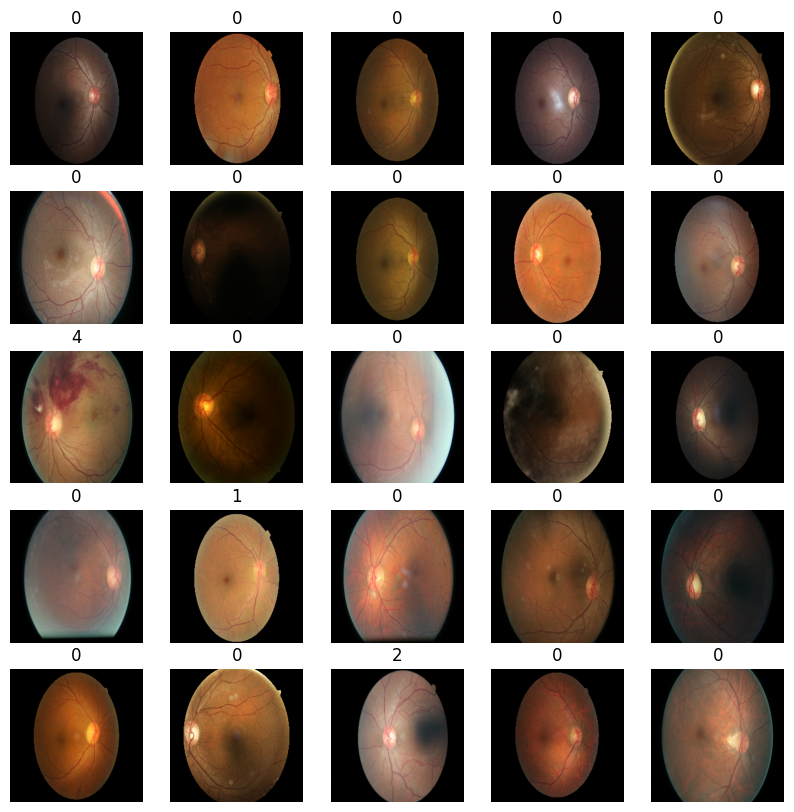

In [30]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

In [31]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_statuse)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/inception_v3/classification/5"

In [32]:
INPUT_SHAPE


[None, 224, 224, 3]

In [33]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [34]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/inception_v3/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              23853833  
                                                                 
 dense (Dense)               (None, 5)                 5010      
                                                                 
Total params: 23858843 (91.01 MB)
Trainable params: 5010 (19.57 KB)
Non-trainable params: 23853833 (91.00 MB)
_________________________________________________________________


In [35]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [36]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Dog Vision/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [37]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

In [38]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [39]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [40]:
#Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/inception_v3/classification/5
Epoch 1/100
100/100 [==============================] - 436s 4s/step - loss: 1.0938 - accuracy: 0.6662 - val_loss: 0.9135 - val_accuracy: 0.7225
Epoch 2/100
100/100 [==============================] - 97s 972ms/step - loss: 0.9149 - accuracy: 0.6959 - val_loss: 0.8759 - val_accuracy: 0.7125
Epoch 3/100
100/100 [==============================] - 99s 991ms/step - loss: 0.8723 - accuracy: 0.7100 - val_loss: 0.8724 - val_accuracy: 0.7375
Epoch 4/100
100/100 [==============================] - 100s 1s/step - loss: 0.8202 - accuracy: 0.7150 - val_loss: 0.8774 - val_accuracy: 0.6925
Epoch 5/100
100/100 [==============================] - 102s 1s/step - loss: 0.8263 - accuracy: 0.7109 - val_loss: 1.0127 - val_accuracy: 0.7362
Epoch 6/100
100/100 [==============================] - 101s 1s/step - loss: 0.7839 - accuracy: 0.7225 - val_loss: 0.8658 - val_accuracy: 0.7188


In [41]:
predictions = model.predict(val_data, verbose=1) # verbose shows us how long there is to go
predictions

25/25 [==============================] - 21s 808ms/step


array([[6.50402784e-01, 1.44817919e-01, 1.88405186e-01, 1.58054791e-02,
        5.68518648e-04],
       [7.78493285e-01, 1.87803224e-01, 1.95524544e-02, 1.24983415e-02,
        1.65272504e-03],
       [8.12139988e-01, 7.09587932e-02, 1.00061849e-01, 1.65232923e-02,
        3.16041667e-04],
       ...,
       [7.34678388e-01, 9.48212296e-02, 1.67757809e-01, 8.29354511e-04,
        1.91320572e-03],
       [2.62227893e-01, 2.51213983e-02, 5.69811106e-01, 1.26061171e-01,
        1.67784132e-02],
       [5.10270178e-01, 5.69926482e-03, 9.58351716e-02, 1.60437763e-01,
        2.27757707e-01]], dtype=float32)

In [42]:
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_statuse[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

0

In [43]:
 #Create a function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_statuse[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]], dtype=float32),
 0)

In [44]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

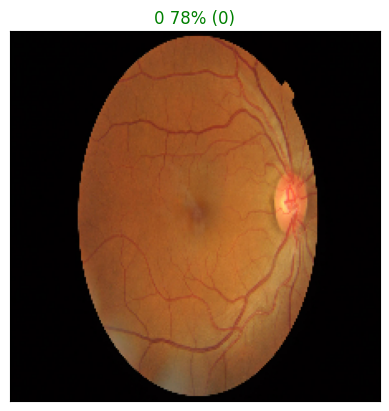

In [45]:
# View an example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

In [46]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_statuse[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

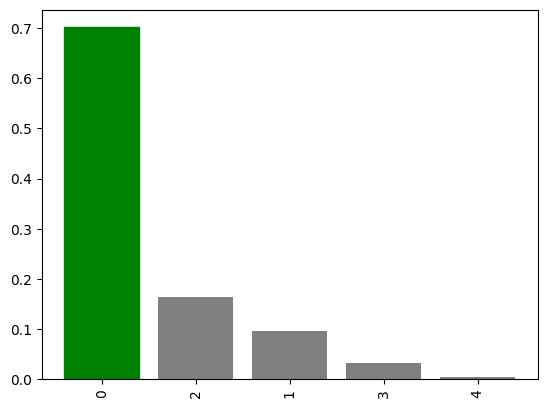

In [47]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

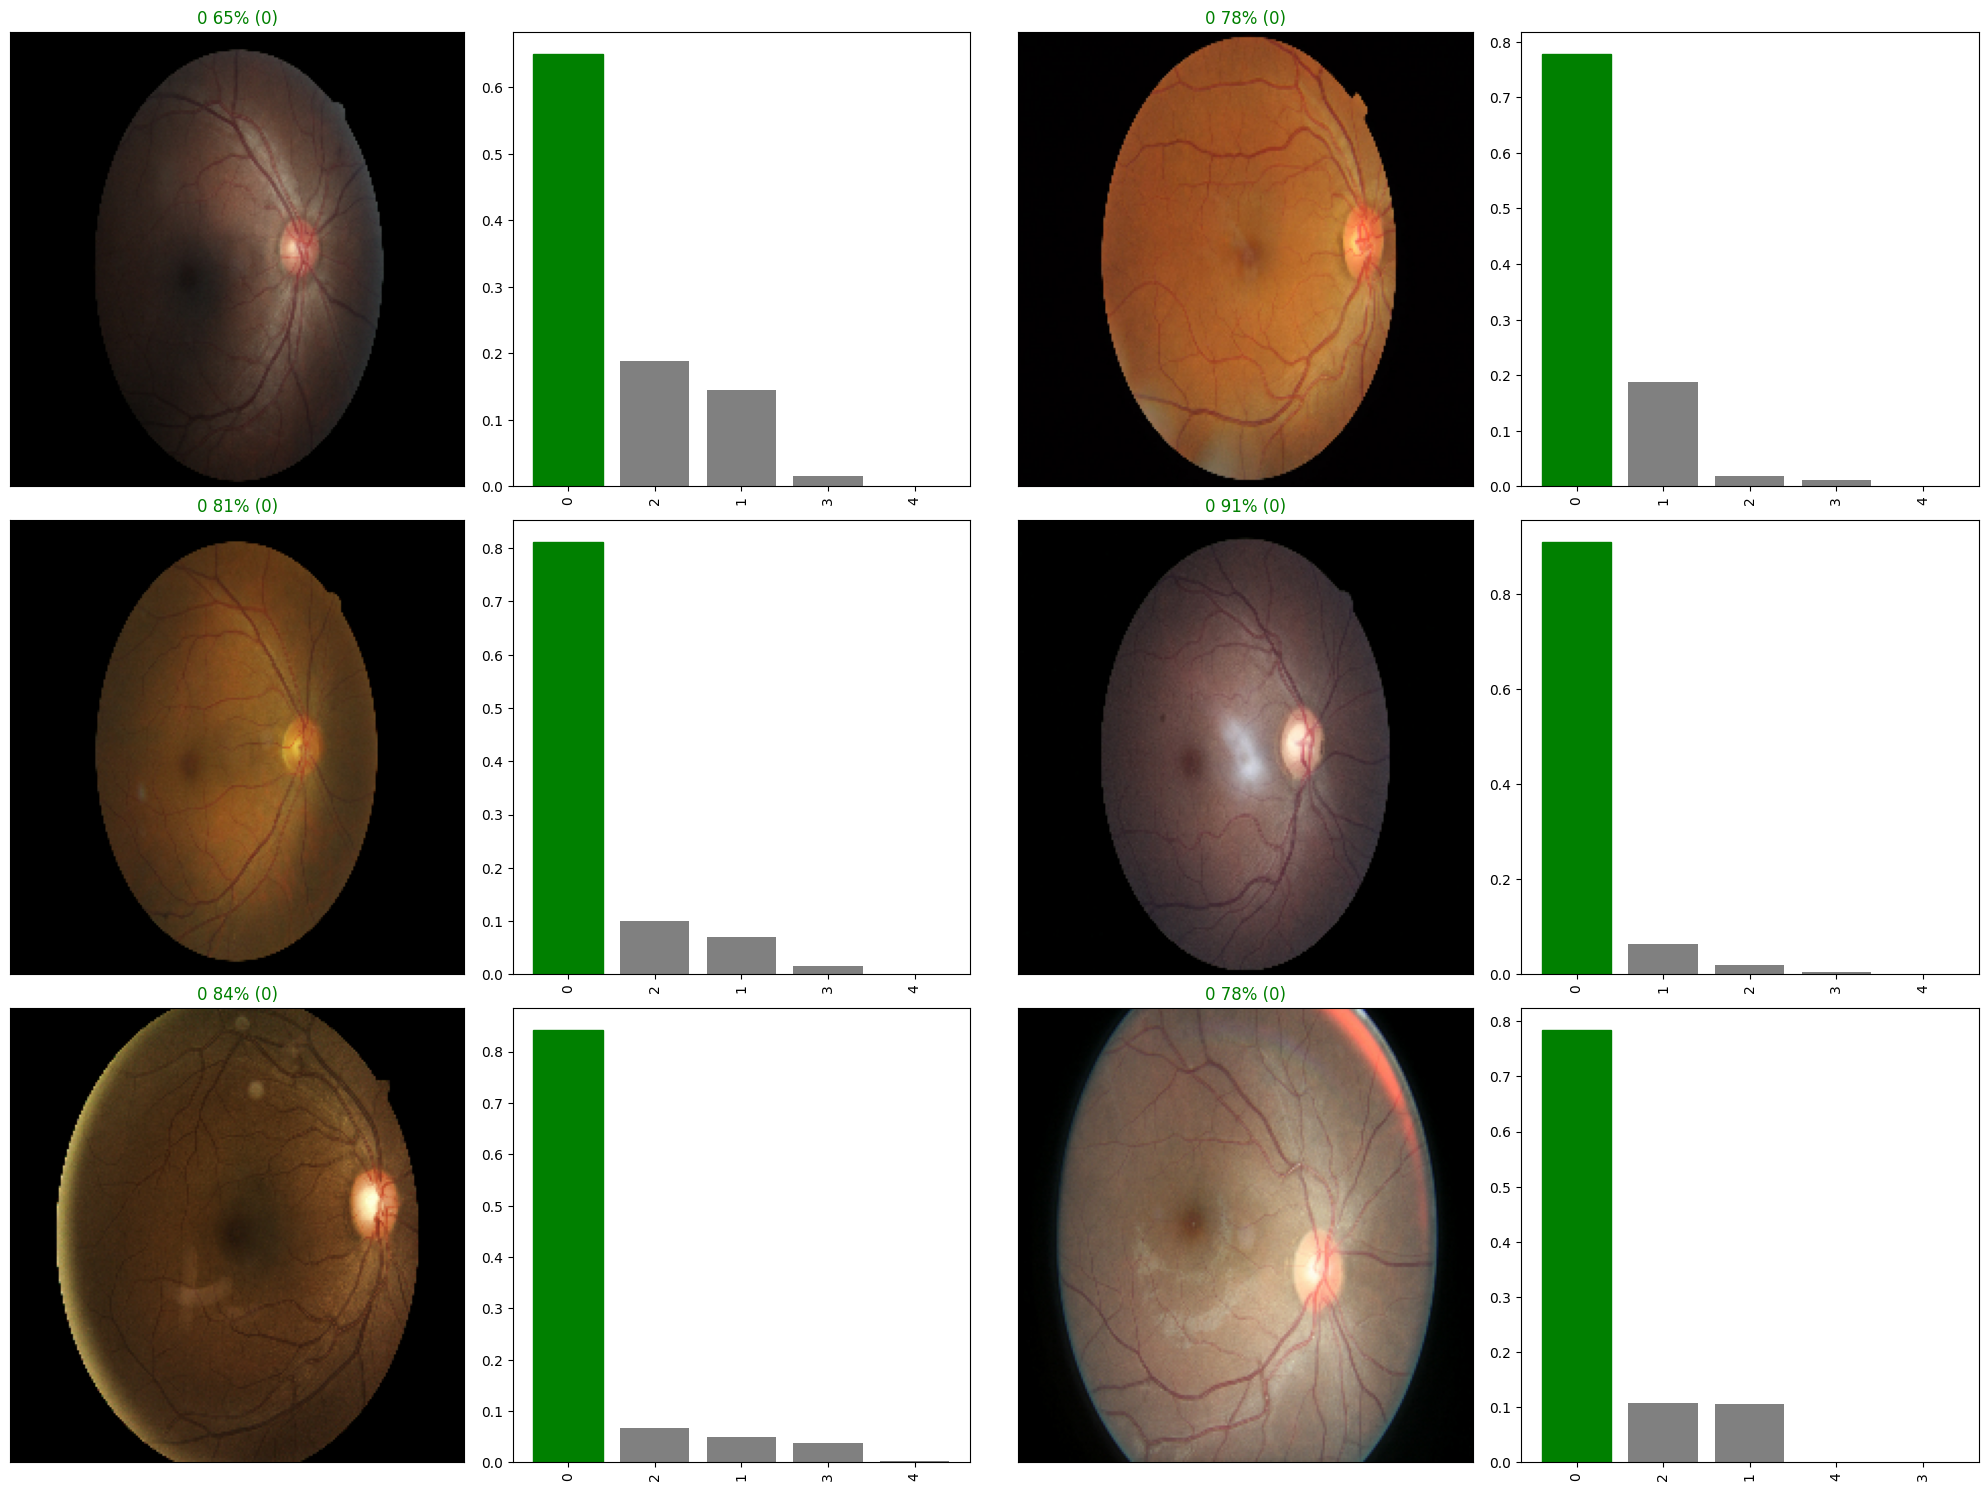

In [48]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [49]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("drive/My Drive/Data/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [50]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [51]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-Adam")

Saving model to: drive/My Drive/Data/models/20230909-15561694274985-1000-images-Adam.h5...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'drive/My Drive/Data/models/20230909-15561694274985-1000-images-Adam.h5'

In [53]:
# Load our model trained on 1000 images
#model_1000_images = load_model('/content/drive/MyDrive/Data/models/20230908-01251694136307-1000-images-Adam.h5')